# Data Visualization

In [8]:
# !pip install plotnine
# !pip install dfply

# 1. plotnine의 개념

- plotnine : R의 ggplot2에 기반해 그래프를 그려주는 라이브러리
> - `ggplot` : 메인 함수로 데이터 셋과 표현할 데이터 변수명을 정의함. (전체를 괄호로 묶어서 사용)
  - `geoms` : 실제 어떤 데이터 시각화를 할지 정의하는 기하학적 객체
    - `geom_point()`:산점도, `geom_bar()`:막대그래프, `geom_density()`, `geom_line()`, `geom_area()`
  - `aes(x="",y="",fill="" )` : aesthetics (미학적)
    - 형태, 투명도, 색상, 채우기, 라인의 형태 등을 정의
  - `scales` : 데이터가 어떻게 표현될지를 정의
      - 연속형, 이산형, log 등

In [9]:
from plotnine import *
from dfply import *
import numpy as np
import pandas as pd

## 2. plotnine의 활용

### 2.1. iris data

In [18]:
iris = pd.read_csv('C:/Users/yiyeon/TIL/python_study/data/iris.csv')
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
iris.describe()  # 통계량을 요약해주는 메서드

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
iris.Species.value_counts()  # 종류별로 개수 출력
# iris.groupby('Species').size()  # 그룹명과 함께 종류별로 개수 출력

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

### 2.2. Example을 통한 기초 이해

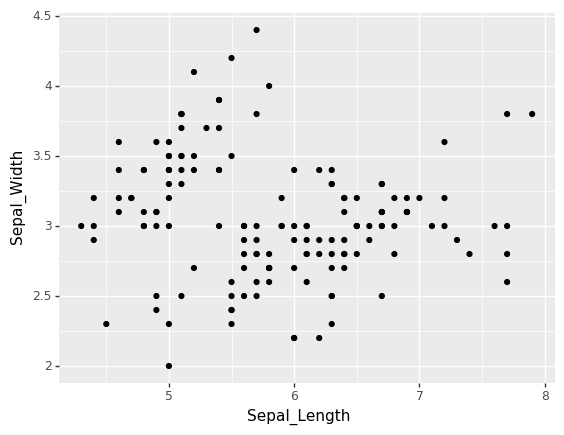

<ggplot: (-9223371921303541928)>

In [26]:
(ggplot(iris, aes("Sepal_Length", "Sepal_Width")) + geom_point())
# geom

### 2.3. 기초 구조의 이해

**`ggplot`** : 메인 함수로 데이터 셋과 표혀할 데이터 변수명을 정의
 - 데이터 시각화를 위한 셋팅 부분
 - 구체적인 데이터 시각화 컴포넌트 대상, 통계모형, 판넬 등을 백지 상에 레이어 형태로 그림을 그림
 
**`aes()`** : aesthetics(미학적)
 - 형태, 투명도, 색상, 채우기, 라인의 형태 등을 정의
 
**`geom`** : 실제 어떤 데이터 시각화를 할지 정의하는 객체
 - geom_point()
 - geom_bar()
 - geom_density()
 - geom_line()
 - geom_area()

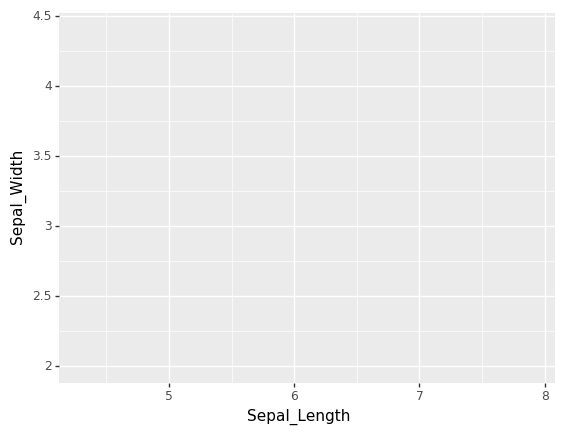

<ggplot: (-9223371921303455588)>

In [28]:
myplot = ggplot(iris, aes("Sepal_Length", "Sepal_Width"))  # 형태(바탕)를 정의
myplot

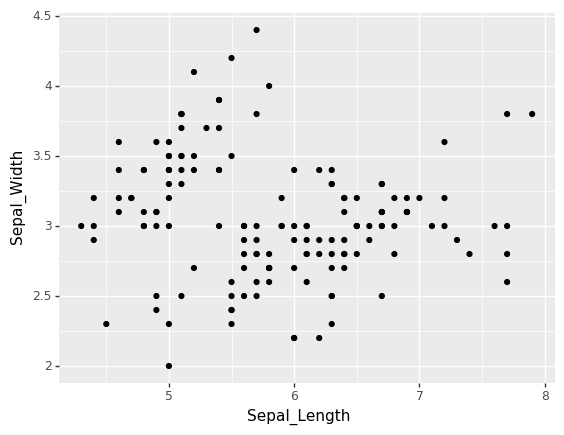

<ggplot: (-9223371921302932496)>

In [29]:
(myplot + geom_point())  # 구체적인 그래프 그리기

### 2.4. Further examples

####  2.4.1. Increase the size of poins

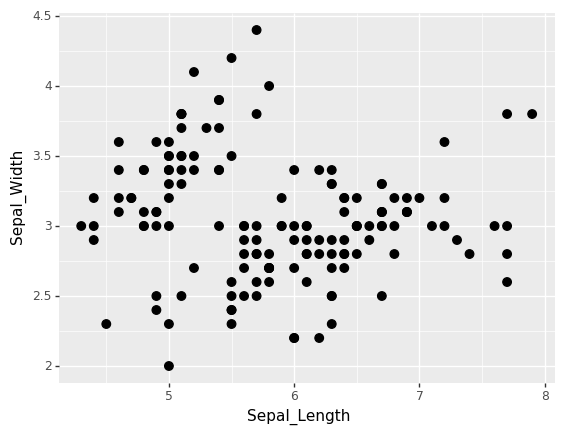

<ggplot: (-9223371921302925920)>

In [32]:
(ggplot(iris, aes("Sepal_Length", "Sepal_Width")) + 
 geom_point(size = 3))  # size : 점의 크기 설정

#### 2.4.2. Add some color

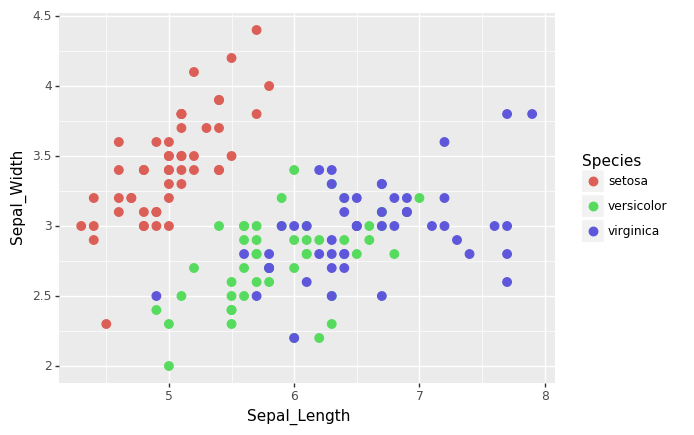

<ggplot: (-9223371921302967908)>

In [33]:
(ggplot(iris, aes("Sepal_Length", "Sepal_Width", color="Species")) + 
 geom_point(size = 3))

# geom_point에 aes를 줘도 동일한 결과
# (ggplot(iris, aes("Sepal_Length", "Sepal_Width")) +
# geom_point(aes(color = "Species"), size = 3))

#### 2.4.3. Differentiate points by shape

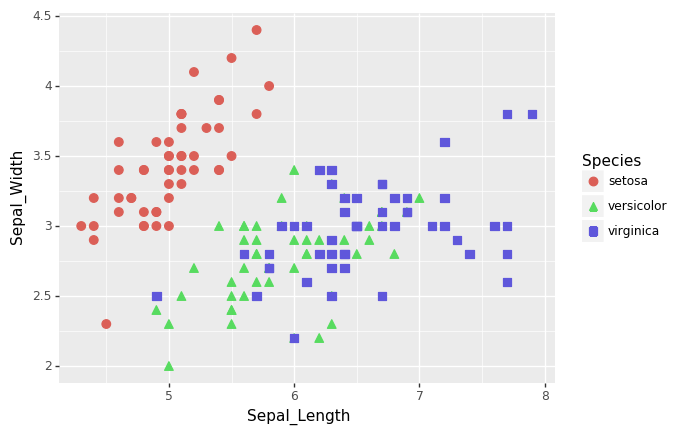

<ggplot: (-9223371921302861340)>

In [34]:
(ggplot(iris, aes("Sepal_Length", "Sepal_Width", color="Species")) + 
 geom_point(aes(shape = "Species"), size = 3))

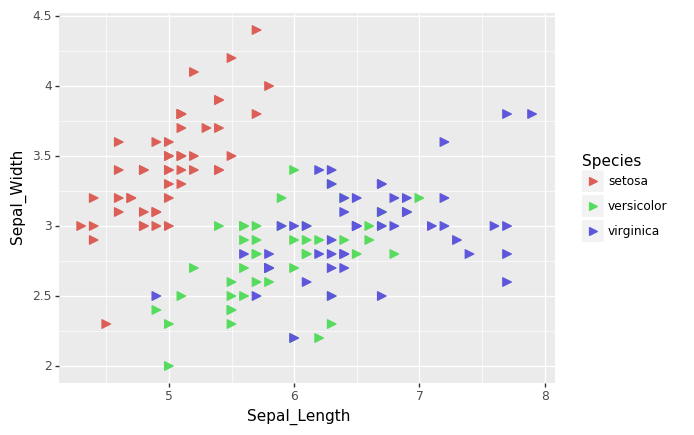

<ggplot: (-9223371921302867316)>

In [35]:
(ggplot(iris, aes("Sepal_Length", "Sepal_Width")) + 
 geom_point(aes(color = "Species"), size = 3, shape = ">"))

## 3. 데이터 시각화 컴포넌트

### 3.1. Box plots
- 많은 데이터 집합의 범위와 중앙값을 빠르게 확인
- 통계적으로 이상치(outlier)가 있는지 확인
- 상자 수염 그림(Box-and-Whisker plot)이라고도 함

![nn](image/box_plot.png)

> - 최댓값 : 제 3사분위에서 1.5IQR을 더한 위치
- 제 3사분위(Q3) : 75% 위치를 의미
- 제 2사분위(Q2) : 50% 위치로 중앙값(median)을 의미
- 제 1사분위(Q1) : 25% 위치를 의미
- 최솟값 : 제 1사분위에서 1.5IQR을 뺀 위치
- 최솟값과 최댓값을 벗어나는 위치에 있는 값을 이상치(Outlier)이라 함
- IQR : 사분 범위 IQR이라는 것은 중앙에 50% 데이터들이 흩어진 정도를 의미( = Q3 - Q1)

In [39]:
birthwt = pd.read_csv("../python_study/data/birthwt.csv")
birthwt.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


In [40]:
birthwt.dtypes

low      int64
age      int64
lwt      int64
race     int64
smoke    int64
ptl      int64
ht       int64
ui       int64
ftv      int64
bwt      int64
dtype: object

- race에 따른 신생아의 몸무게 Boxplot을 그리려고함
- 하지만 race의 데이터 타입이 숫자형이어서 의도대로 Boxplot이 그려지지 않음

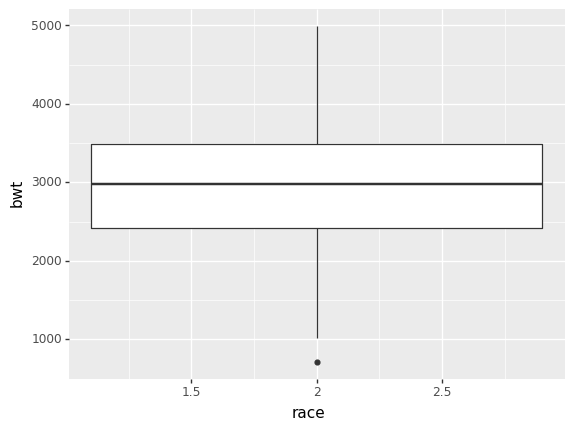

<ggplot: (-9223371921302910232)>

In [41]:
(ggplot(birthwt , aes("race", "bwt")) + geom_boxplot())

- factor()를 이용하여 범주형 변수로 바꿔준 뒤 시각화

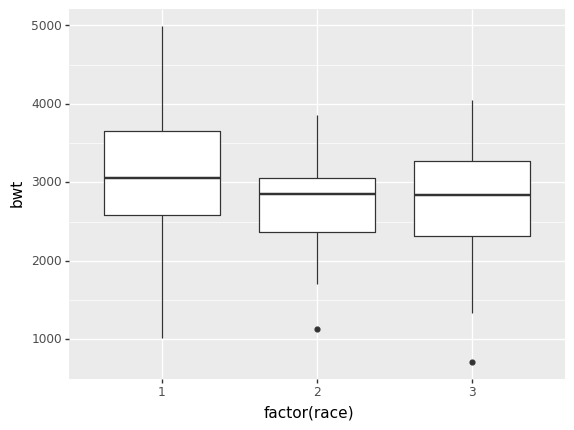

<ggplot: (-9223371921302897276)>

In [42]:
(ggplot(birthwt , aes("factor(race)", "bwt")) + geom_boxplot())

- 일일이 색을 채우려고하지만 race는 여전히 숫자형 변수임
- factor()를 일일이 붙여야하는 불편함이 있음

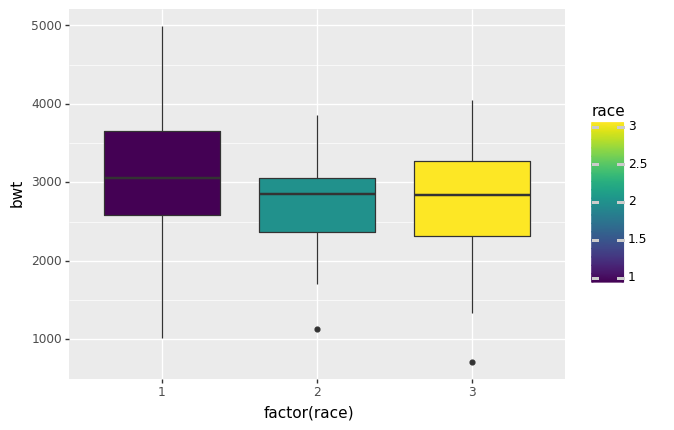

<ggplot: (-9223371921301778824)>

In [43]:
(ggplot(birthwt , aes("factor(race)", "bwt", fill='race')) + geom_boxplot())

- 데이터 타입을 object로 변경 한 후에 시각화를 진행
- astype(dtype) : 모든 열의 데이터 타임을 변경
- astype({'컬럼명':dtype}) : 특정 컬럼의 데이터 타입을 변경

In [46]:
birthwt['race'] = birthwt['race'].astype('object')  
birthwt.dtypes

low       int64
age       int64
lwt       int64
race     object
smoke     int64
ptl       int64
ht        int64
ui        int64
ftv       int64
bwt       int64
dtype: object

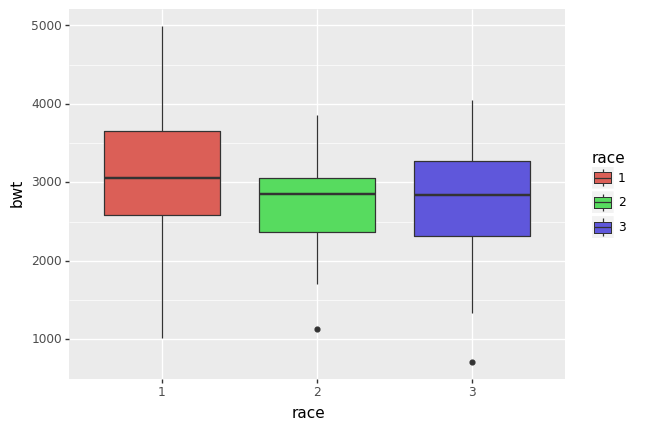

<ggplot: (-9223371921301763920)>

In [47]:
(ggplot(birthwt , aes("race", "bwt", fill='race')) + geom_boxplot())

### 3.2. Histograms

**Histogram의 특징**
- Table 형태의 빈도(개수)를 Graphical하게 표현한 것(도수분포표 -> 시각화)
- bin : Histogram의 한 구간
    
**Histogram과 막대그래프의 차이**
- 막대그래프는 보통 연속되지 않는 자료들을 그래프로 그릴 때 사용  
  ex) 사과는 몇 개, 수박은 몇개, 사과와 수박은 서로 연결 할 수 없음
- Histogram은 60 ~ 70점, 70 ~ 80점 처럼 서로 연속된 자료를 나타낼 때 사용
    - 끝값인 70점과 시작점인 70점이 서로 연결

In [48]:
birthwt.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


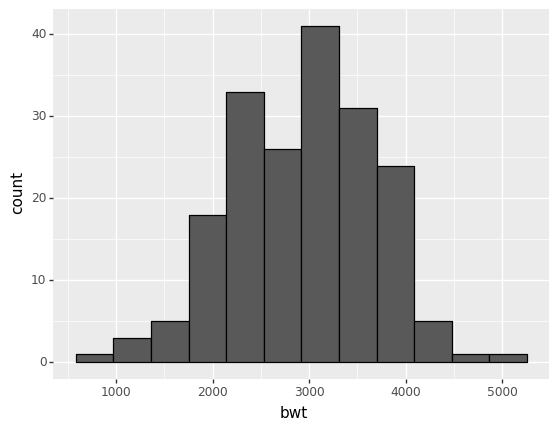

<ggplot: (-9223371921302941824)>

In [49]:
(ggplot(birthwt, aes("bwt")) + 
 geom_histogram(color = "black", bins = 12))

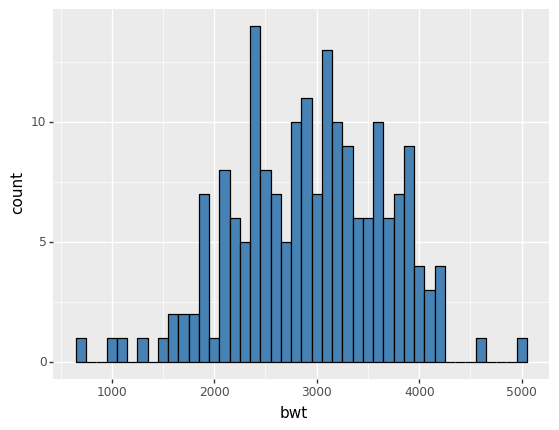

<ggplot: (-9223371921301705412)>

In [50]:
(ggplot(birthwt, aes("bwt")) + 
    geom_histogram(binwidth = 100, fill = "steelblue", color = "black"))

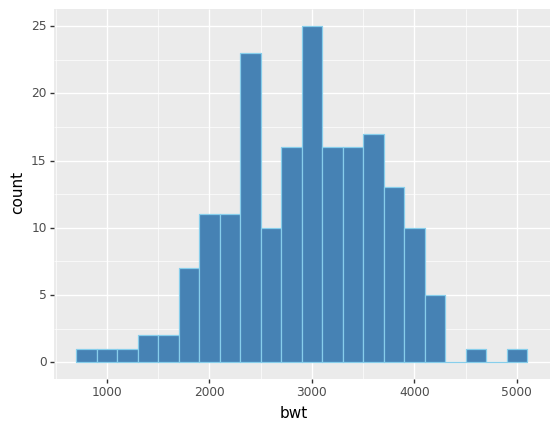

<ggplot: (-9223371921301512260)>

In [51]:
(ggplot(birthwt, aes("bwt")) +
    geom_histogram(binwidth = 200 , fill = "steelblue", color = "skyblue"))

### 3.3. Line plots

In [61]:
climate = pd.read_csv("../python_study/data/climate.csv")
climate.head()

,Source,Year,Anomaly 1y,Anomaly 5y,Anomaly 10y,Unc 10y
0,1,1901,0.015,0.010,-0.162,0.109
1,1,1902,0.028,-0.017,-0.177,0.108
2,1,1903,0.049,-0.040,-0.199,0.104
3,1,1904,0.068,-0.040,-0.223,0.105
4,1,1905,0.128,-0.032,-0.241,0.107


In [62]:
climate.dtypes

Source           int64
Year             int64
Anomaly 1y     float64
Anomaly 5y     float64
Anomaly 10y    float64
Unc 10y        float64
dtype: object

In [65]:
climate= climate.rename(columns={'Anomaly 1y' : 'Anomaly1y',
                                'Anomaly 5y' : 'Anomaly5y',
                                'Anomaly 10y' : 'Anomaly10y',
                                'Unc 10y' : 'Unc10y',})
# rename(columns={'기존컬럼명':'바꿀컬럼명'}, index={'기존 인덱스명':'바꿀 인덱스명'})
# 변수명에 공백이 있으면 그래프가 안그려짐

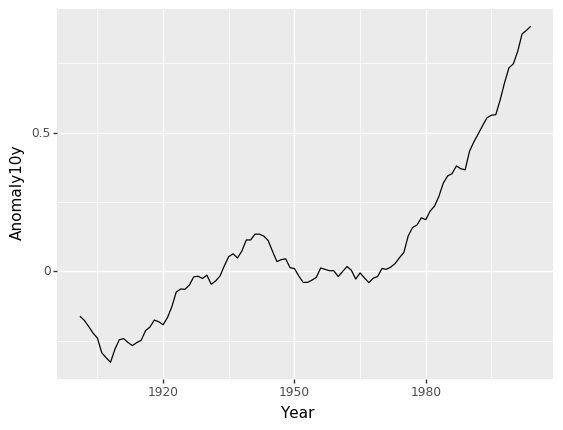

<ggplot: (-9223371921302965204)>

In [66]:
(ggplot(climate, aes("Year", "Anomaly10y")) +
 geom_line())

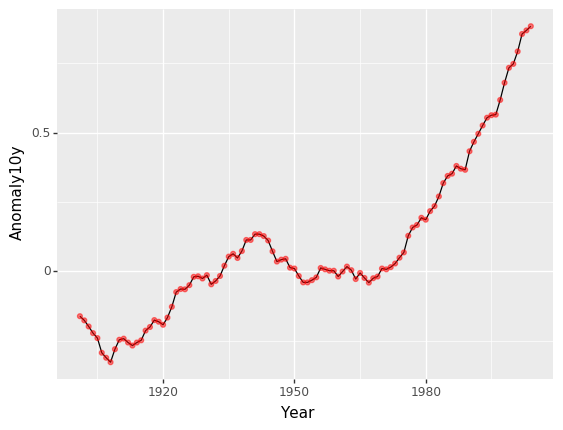

<ggplot: (-9223371921301241780)>

In [67]:
(ggplot(climate, aes("Year", "Anomaly10y")) +
     geom_line() +
     geom_point(color = "red", alpha = 0.5))  # alpha : 표식설정

In [68]:
climate['ymin'] = climate['Anomaly10y'] - climate['Unc10y']
climate['ymax'] = climate['Anomaly10y'] + climate['Unc10y']
climate.head()

,Source,Year,Anomaly1y,Anomaly5y,Anomaly10y,Unc10y,ymin,ymax
0,1,1901,0.015,0.010,-0.162,0.109,-0.271,-0.053
1,1,1902,0.028,-0.017,-0.177,0.108,-0.285,-0.069
2,1,1903,0.049,-0.040,-0.199,0.104,-0.303,-0.095
3,1,1904,0.068,-0.040,-0.223,0.105,-0.328,-0.118
4,1,1905,0.128,-0.032,-0.241,0.107,-0.348,-0.134


**`geom_ribbon()`** : line 주변에 음역지역을 표시
- Y의 최대값과 최소값 사이의 면적을 표시
- aesthetic에 (ymin, ymax)를 필수적으로 요구

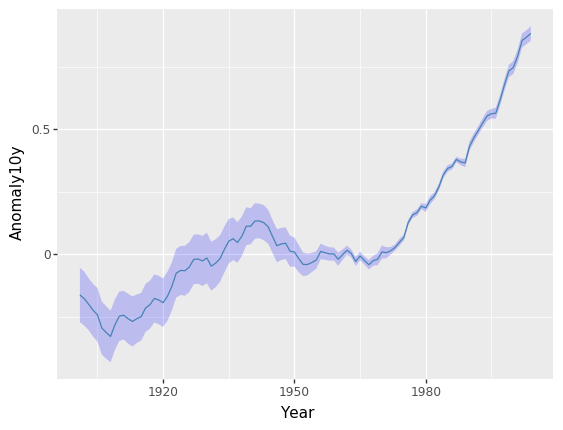

<ggplot: (-9223371921301140388)>

In [72]:
(ggplot(climate, aes('Year', 'Anomaly10y')) + 
     geom_ribbon(aes(ymin ='ymin', ymax = 'ymax'), fill = "blue", alpha = .2) +
     geom_line(color = "steelblue"))

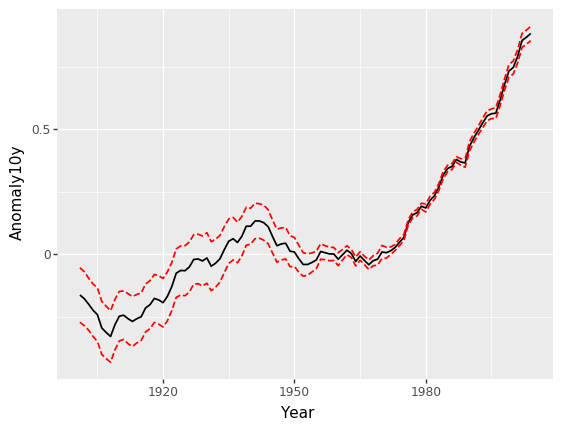

<ggplot: (-9223371921301199696)>

In [73]:
(ggplot(climate, aes('Year', 'Anomaly10y')) +
     geom_line(size = 0.7, color = "black") + 
     geom_line(aes('Year', 'ymin'), linetype = "dashed", size = 0.7, color = "red") + 
     geom_line(aes('Year', 'ymax'), linetype = "dashed", size = 0.7, color = "red"))

`geom_area()` : `geom_ribbon()` 과 비슷하지만, ymin은 0으로, ymax는 Y값 자체로 고정되어 있다는 차이가 있음